In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\HP\Documents\NareshIT\Data Files\Visadataset - Visadataset (1).csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Box plot**

- box plot is used for detect outliers
- box plot has min,q1,q2,q3 and max value
- inside box plot red line representd median which 50 percentile data

**outlier**

- very very huge observation
- very very small observation
- which pull the data in any side of three distribution
- mild outliers

     - q1-1.5*IQR and q3+1.5IQR

- strong outliers

    - q1-3IQR and q3+3IQR

- IQR:inter quartile range

    - IQR=Q3-Q1

- q1:25p

- q2:50p

- q3:75p

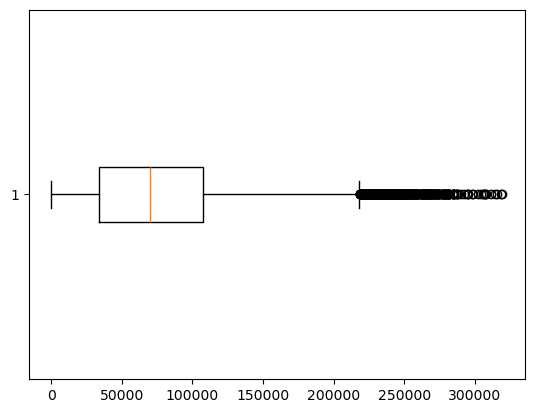

In [4]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

<Axes: >

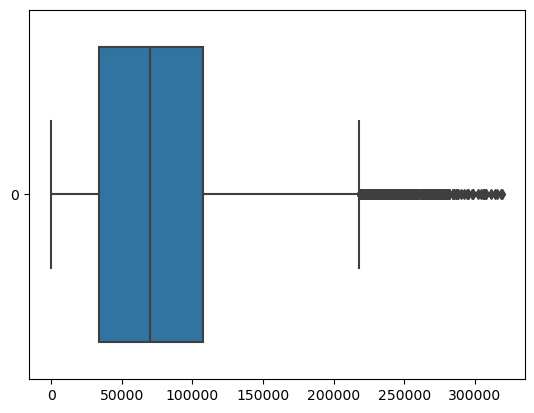

In [8]:
sns.boxplot(visa_df['prevailing_wage'],orient="h")

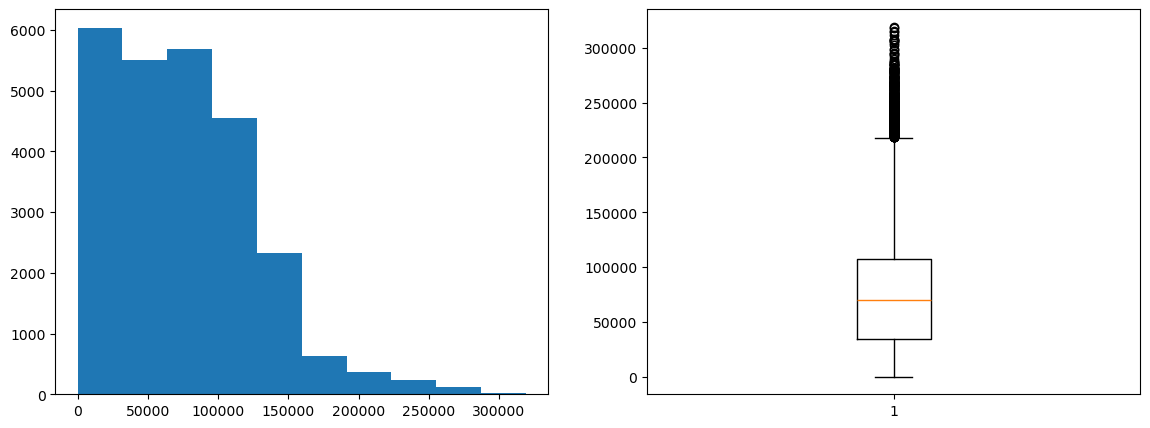

In [7]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**Finding the outliers**

- outliers are available less than q1-1.5*IQR

- outliers are available greater than q3+1.5*IQR

- step-1:

    - calculate Q1: 25p

    - calculate Q3: 75p

    - calculate IQR: Q3-Q1

- Step-2:

    - LB= Q1-1.5*IQR

    - UB= Q3+1.5*IQR

- step-3:

    - con1=visa_df['prevailing_wage']<LB

    - con2=visa_df['prevailing_wage']>UB

    - apply or operator and get the outliers data

In [9]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1 | con2]
len(outliers_data)

427

In [10]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

0

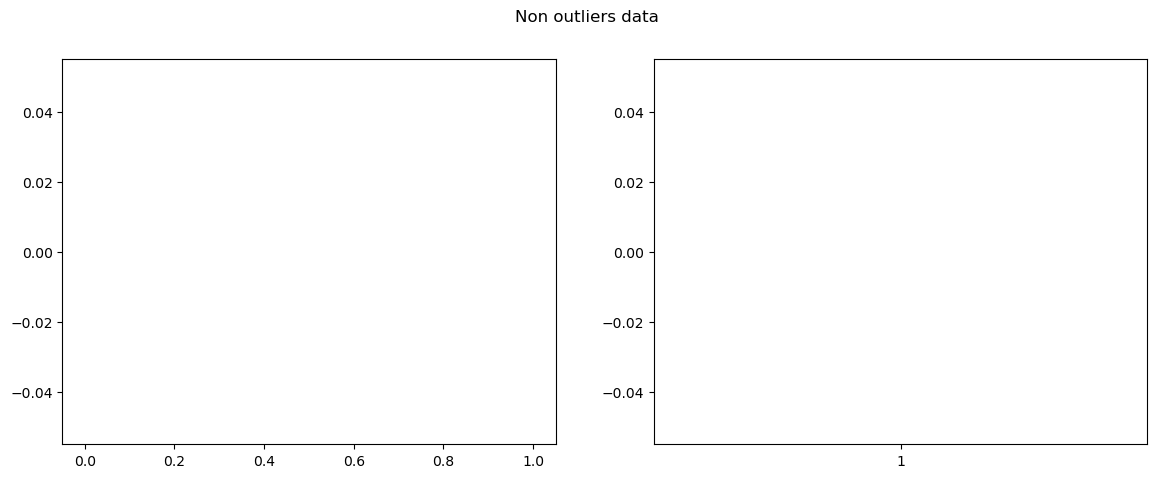

In [12]:
plt.figure(figsize=(14,5))
plt.suptitle('Non outliers data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

**comparing total data with non outliers data**

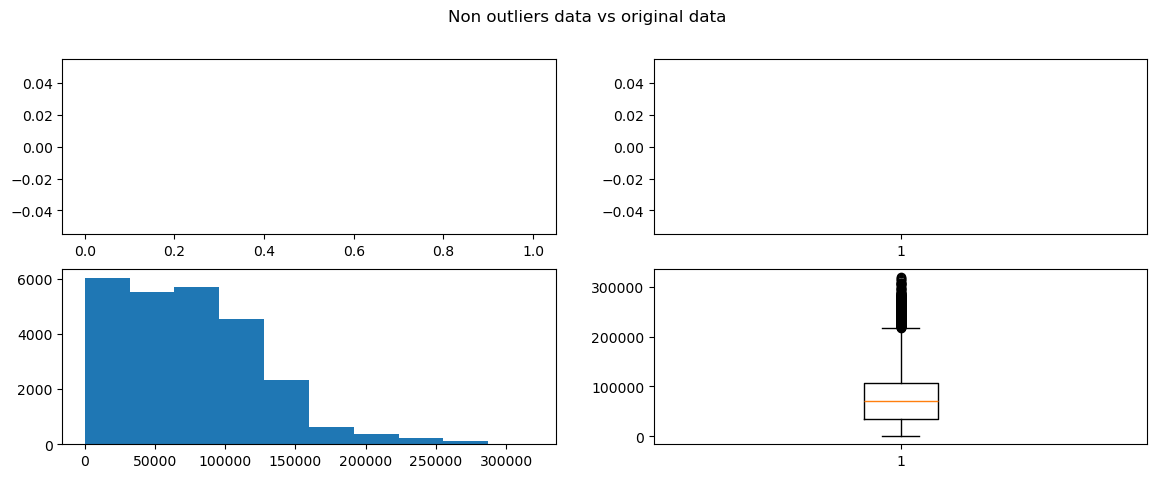

In [13]:
plt.figure(figsize=(14,5))

plt.suptitle('Non outliers data vs original data')
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage'])


plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])
plt.show()

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**How to deal the outliers**

**Method-1:Drop the outliers**

- Drop the outliers is not a good idea

- when you drop the outliers, data will loss

- for example here we are droping 427 rows

- x% of 25480=427

- it is 1.7% data, here it is fine we can drop the outlier

**Method-2: Fill with median value**

- we already know that outliers does not affect the median

- so we can fill outliers by median

**Method-3: Cap the values with Q1 and Q3**

- all less than lower bound values, we can replace with q1 or LB

- all greater than upper bound values, we can replace with q3 or UB

**Fill with median**

  - create a empty list

  - calculate median value:visa_df['prevailing_wage'].median

  - iterate through visa_df['prevailing_wage'].values

  - if each value i.e. i, ub then append with median values

  - else append with i value

In [ ]:
l1=[]
median=visa_df['prevailing_wage'].median()
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
for value in visa_df['prevailing_wage'].values:
    if value<LB or value>UB:
        l.append(median)
    else:
        l.append(value)


**np.where**

- np.where will use for binary condition

- It has 3 arguments

    - condition

    - value if condition is True

    - value if condition is False

In [15]:
d={"sub":["DS","ML","CS"],"Marks":[100,150,20]}
data=pd.DataFrame(d)
data

,sub,Marks
0,DS,100
1,ML,150
2,CS,20


In [16]:
con=data['Marks']>100
l=np.where(con,1,data['Marks'])
l

array([100,   1,  20], dtype=int64)

In [ ]:
con=visa_df['prevailing_wage']<LB | visa_df['prevailing_wage']>UB
median=visa_df['prevailing_wage'].median()
new_data=np.where(con,median,visa_df['prevailing_wage'])